<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

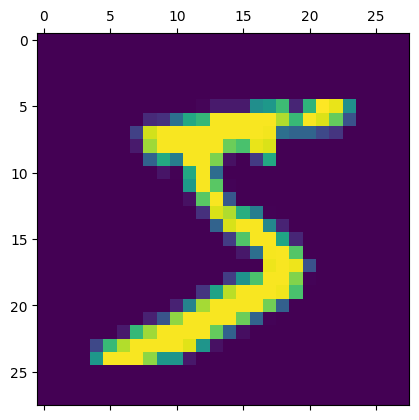

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

c:\Users\SUBHRADIP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8750 - loss: 0.4428
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9614 - loss: 0.1316
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9739 - loss: 0.0876
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9786 - loss: 0.0686
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9842 - loss: 0.0516


In [12]:
#%load_ext tensorboard
#%tensorboard --logdir logs/fit

# if we use these to above command we can see the tensorboard in jupyter notebook

#but if we use this command in terminal we can see the tensorboard in browser
# tensorboard --logdir logs/ and we prefer to use this command

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [13]:
model.get_weights()

[array([[ 0.07634102, -0.02149901,  0.06383766, ..., -0.02890142,
         -0.05657108,  0.02845056],
        [-0.06124175,  0.06812942, -0.06581753, ...,  0.05586323,
          0.04273382, -0.06577294],
        [ 0.03688587,  0.08155504, -0.04513949, ..., -0.06237247,
         -0.07354294,  0.05143365],
        ...,
        [-0.00868221, -0.05819861,  0.04923904, ...,  0.06414028,
         -0.04698448, -0.03172911],
        [ 0.08111706, -0.07387216, -0.04340182, ..., -0.08081502,
          0.04420601,  0.01484827],
        [ 0.00534957,  0.04778852, -0.0616947 , ...,  0.06010617,
         -0.06286624,  0.00559834]], dtype=float32),
 array([-0.06908855,  0.01601085,  0.07591929, -0.04287111,  0.08024327,
         0.01593948,  0.20458987, -0.03344809, -0.04189483, -0.11263822,
        -0.02423336, -0.03328785,  0.0073291 ,  0.22006415,  0.00828591,
        -0.02702038, -0.02164796, -0.04609382,  0.08441398, -0.07373191,
        -0.07473367,  0.14927463,  0.02809508, -0.04644942,  0.017